# HW 15 - Animation
ULAB - Physics and Astronomy Division \
Due **Sunday, March 9th, 2025 at 11:59pm** on Gradescope

## 1 Modify the Animation from Lecture
Modify the given sine wave animation so that the wave moves twice as fast. What parts of the code you you need to change, and why? Please specifically highlight this in your code

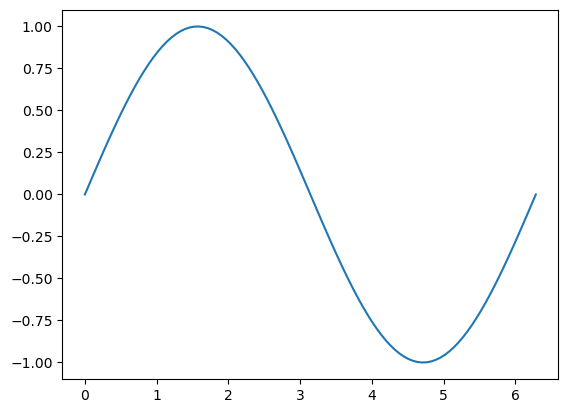

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#Create x values
x = np.linspace(0, 2 * np.pi, 100)

#create figure and axes
fig, ax = plt.subplots()

#create the sine wave plot
line, = ax.plot(x, np.sin(x))

def update(frame):
    """Update the sine wave to shift horizontally twice as fast."""
    line.set_ydata(np.sin(x + frame / 5.0))  #increased speed by 2
    return line,

#create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=25, blit=True)

plt.show()

Save the animation as a .mp4 or a .gif and include it you repository for submission. 

In [7]:
ani.save("sine_wave.mp4", writer="ffmpeg", fps=40)

Explain what happens if you set `blit=True` in `FuncAnimation`? What happens if you set it to `blit=False`?

In [ ]:
# Blit determines if the picture is redrawn everytime or if only the parts that are changing are redrawn. Blit = True optimizes the redrawing of the figure because it only draws the parts that need redrawing, while setting blit = False redraws it every time.

## 2 A Different Animation
Write an animation where a dot moves in a circular path instead of sine wave. *Hint: You will need to use `np.sin` and `np.cos`. 

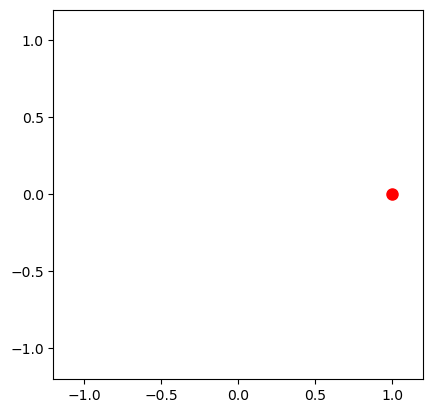

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')

#Create the moving dot
dot, = ax.plot([], [], 'ro', markersize=8)

def update(frame):
    """Updates the dot's position along a circular path."""
    theta = frame * np.pi / 50
    x = np.cos(theta)  # X-coordinate
    y = np.sin(theta)  # Y-coordinate
    dot.set_data([x], [y])
    return dot,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)

plt.show()

Save the animation as a .mp4 or a .gif and include it you repository for submission. 

In [12]:
writer = animation.FFMpegWriter(fps=30)
ani.save("circle_motion.mp4", writer=writer)

## 3 Simulate Orbital Motion of Planets and a Comet
**Check out the `example_solar_system_animation.mp4` as an example of what you will be creating in this problem.**

Now you will simulate and visualize the orbital motion of Earth, Mars and a coment around the Sun using Newtonian gravity and Python. Here are the steps:
* Calculate the gravitational forces acting on each body.
* Update positions and velocities over time.
* Simulate the motion of these celestial bodies over a period of 5 years.
* Animate the results to observe orbital patterns. 

Let's dig a bit into the physics. The motion of celestial bodies follows **Newton's laws of motion and gravitation**:
$$
F = G \frac{m_1 m_1}{r^2}
$$

where:
* $F$ is the gravitational force.
* $G = 6.67\times10^{-11}$ is the gravitational constant
* $m_1$, $m_2$ are the measses of the two objects.
* $r$ is the distance between them.

Using **Newton's Second Law**, the acceleration is given by:

$$
a = \frac{F}{m}
$$

where $a$ is the acceleration, and $m$ is the object's mass. The velocity and position are updated with numerical integration:

$$
v = v + a \cdot dt
$$

$$
x = x + v \cdot dt
$$

## 3.1 Implementing the Simulation
Goal: Set up the **masses**, **initial positions** and **velocities** for the Sun, Earth, Mars and a comet. 
* Use SI units (meters, kilograms, seconds).
* The Sun is at the origin (0, 0, 0)
* Earth, Mars and the commet start at **aphelion** (farthest from the Sun).

Start by defining the following initial variables in kilograms (or SI units):
* `G`
* `Ms` (the mass of the Sun, you will need to google this)
* `Me` (the mass of the Earth)
* `Mm` (the mass of Mars)
* `Mc = 6.39e20` (the mass of a comet)
* `AU` (astronomical unit, distance between Earth and the Sun)
* `daysec` (how many seconds are in a day)

In [16]:
G = 6.67e-11  

#mass in kg
Ms = 1.989e30  # Sun
Me = 5.972e24  # Earth
Mm = 6.417e23  # Mars
Mc = 6.39e20   # Comet

# Astronomical Unit in meters
AU = 1.496e11  

#Seconds in day
daysec = 86400

Now we will define some initial velocities in meters per second:
* `e_ap_v` (Earth at aphelion, google it, make sure its in SI units)
* `m_ap_v` (Mars at aphelion)
* `commet_v = 7000` (speed of the comet)

In [54]:
#Earth's velocity at aphelion
r_earth_aphelion = AU  #earth distance from Sun
e_ap_v = np.sqrt(G * Ms / r_earth_aphelion)

#Mars' velocity at aphelion
r_mars_aphelion = 1.666 * AU  #Distance from Sun for Mars at aphelion
m_ap_v = np.sqrt(G * Ms / r_mars_aphelion)

#Comet's velocity
commet_v = 7000  # Comet's velocity in m/s

#Print calculated velocities
print(f"Earth's velocity at aphelion (e_ap_v): {e_ap_v:.2f} m/s")
print(f"Mars' velocity at aphelion (m_ap_v): {m_ap_v:.2f} m/s")
print(f"Comet's velocity (commet_v): {commet_v} m/s")

Earth's velocity at aphelion (e_ap_v): 29779.30 m/s
Mars' velocity at aphelion (m_ap_v): 23071.56 m/s
Comet's velocity (commet_v): 7000 m/s


Run the cell below to define some gravitational constants because we expect no mass loss:

In [57]:
gravconst_e = G * Me  # Earth
gravconst_m = G * Mm  # Mars
gravconst_c = G * Mc  # Comet
gravconst_s = G * Ms  # Sun

Define the initial positions of the Earth, Mars and the comet. Here is the Earth as an example:
* `xe, ye, ze = 1.0167 * AU, 0, 0`

Follow the same pattern for Mars (where the `x` coordinate is at `1.666 * AU`, everything else is zero) and the comet (where the `x` coordinate is at `2* AU`, the `y` coordinate is `0.3 * AU` and the `z` coordinate is zero) . Remember the sun is at the origin! 

In [60]:
# Earth position
xe, ye, ze = 1.0167 * AU, 0, 0

# Mars position
xm, ym, zm = 1.666 * AU, 0, 0

# Comet position
xc, yc, zc = 2 * AU, 0.3 * AU, 0

# Print initial positions
print(f"Earth's initial position: ({xe:.2f}, {ye:.2f}, {ze:.2f}) m")
print(f"Mars' initial position: ({xm:.2f}, {ym:.2f}, {zm:.2f}) m")
print(f"Comet's initial position: ({xc:.2f}, {yc:.2f}, {zc:.2f}) m")


Earth's initial position: (152098320000.00, 0.00, 0.00) m
Mars' initial position: (249233600000.00, 0.00, 0.00) m
Comet's initial position: (299200000000.00, 44880000000.00, 0.00) m


We will do the same thing but for initial velocities. Here is Earth as an example:
* `xve, yve, zve = 0, e_ap_v, 0`

Make variables for Mars but with `m_ap_v` as the `y` coordinate. Make variables for the commet but with `commet_v` as the `y` coordinate.

In [63]:
# Earth's velocity
xve, yve, zve = 0, e_ap_v, 0

# Mars' velocity
xvm, yvm, zvm = 0, m_ap_v, 0

# Comet's velocity
xvc, yvc, zvc = 0, commet_v, 0

# Print initial velocities
print(f"Earth's initial velocity: ({xve:.2f}, {yve:.2f}, {zve:.2f}) m/s")
print(f"Mars' initial velocity: ({xvm:.2f}, {yvm:.2f}, {zvm:.2f}) m/s")
print(f"Comet's initial velocity: ({xvc:.2f}, {yvc:.2f}, {zvc:.2f}) m/s")


Earth's initial velocity: (0.00, 29779.30, 0.00) m/s
Mars' initial velocity: (0.00, 23071.56, 0.00) m/s
Comet's initial velocity: (0.00, 7000.00, 0.00) m/s


Assume the Sun is at the origin. Make initial positions and velocities for the Sun. It should not be moving so all its velocities coordinates are zero. 

In [66]:
# Sun's position (origin)
xs, ys, zs = 0, 0, 0

# Sun's velocity
xvs, yvs, zvs = 0, 0, 0

# Print Sun's initial position and velocity
print(f"Sun's initial position: ({xs:.2f}, {ys:.2f}, {zs:.2f}) m")
print(f"Sun's initial velocity: ({xvs:.2f}, {yvs:.2f}, {zvs:.2f}) m/s")


Sun's initial position: (0.00, 0.00, 0.00) m
Sun's initial velocity: (0.00, 0.00, 0.00) m/s


Now we will define some time parameters for our simulation. Create variable for the initial time `t` and set it to zero. Create a variable called `dt` for the change in time (steps per day) and set it to `1 * daysec`. Create a varible for `years` and set it to `5`. Finally, create a varible for `sim_years` and set it equal to `years * 365 * daysec`.

In [69]:
# Initial time
t = 0

# Time step
dt = 1 * daysec

years = 5

sim_years = years * 365 * daysec

Create empty lists to store all of your varibles. Run the cell below.

In [73]:
xelist, yelist = [], [],  # Earth positions
xmlist, ymlist = [], [],  # Mars positions
xclist, yclist = [], [],  # Comet positions
xslist, yslist = [], [],  # Sun positions

## 3.2 Compute Gravitational Forces and Update Positions
Goal:
* Implement the **gravitational force equation** to calculate the force acting on each body.
* Compute accelerations using $a = F/m$.
* Update **velocity** and **position**.
* Use a loop to update positions over **5 years**.
* Store the results in lists for plotting.

I will do this part for you, it requires some physics knowledge. But you need to turn this into a loop for when time is less than the simulation time. You want the loop to repeat it itself until that condition is met. 

In [83]:
# Loop over time and update positions and velocities
while t < sim_years:
    #EARTH
    rx, ry, rz = xe - xs, ye - ys, ze - zs
    modr3_e = (rx**2 + ry**2 + rz**2)**1.5
    fx_e = -gravconst_e * rx / modr3_e
    fy_e = -gravconst_e * ry / modr3_e
    
    #update position and velocity
    xve += fx_e * dt / Me
    yve += fy_e * dt / Me
    xe += xve * dt
    ye += yve * dt
    
    # Store Earth's position
    xelist.append(xe)
    yelist.append(ye)

    #Mars
    rx_m, ry_m, rz_m = xm - xs, ym - ys, zm - zs
    modr3_m = (rx_m**2 + ry_m**2 + rz_m**2)**1.5
    fx_m = -gravconst_m * rx_m / modr3_m
    fy_m = -gravconst_m * ry_m / modr3_m
    
    # Update velocity and position
    xvm += fx_m * dt / Mm
    yvm += fy_m * dt / Mm
    xm += xvm * dt
    ym += yvm * dt
    
    # Store Mars' position
    xmlist.append(xm)
    ymlist.append(ym)

    #COMET
    rx_c, ry_c, rz_c = xc - xs, yc - ys, zc - zs
    modr3_c = (rx_c**2 + ry_c**2 + rz_c**2)**1.5
    fx_c = -gravconst_c * rx_c / modr3_c
    fy_c = -gravconst_c * ry_c / modr3_c
    
    # Update velocity and position
    xvc += fx_c * dt / Mc
    yvc += fy_c * dt / Mc
    xc += xvc * dt
    yc += yvc * dt
    
    # Store Comet's position
    xclist.append(xc)
    yclist.append(yc)

    #SUN
    xvs += -(fx_e + fx_m) * dt / Ms
    yvs += -(fy_e + fy_m) * dt / Ms
    xs += xvs * dt
    ys += yvs * dt
    
    # Store Sun's position
    xslist.append(xs)
    yslist.append(ys)

    # Update time
    t += dt

# The loop runs until the total simulation time (sim_years) is reached.


## 3.3 Visualization
Goal: Plot the Orbits
* After simulating the motion, **plot the orbits of Earth, Mars and the comet**.
* Label the **Sun**, **Earth**, **Mars**, and **Comet**.

Start by making a figure, set the argument of`figsize=(8, 8)`.
* Plot the `yelist` as a function of `xelist`. Do this for the `xm`, `xc` and `xs` lists as well. Make sure each line is a **different color**!
  * The Sun will just be a point, so give it a markersize of `10`. Make it yellow.  
* Give it a legend
* Add an `xlabel` of `"X Position (m)"`.
* Add an `ylabel` of `"Y Position (m)"`.
* Give it a title.
* Add a grid.
* Show the plot.

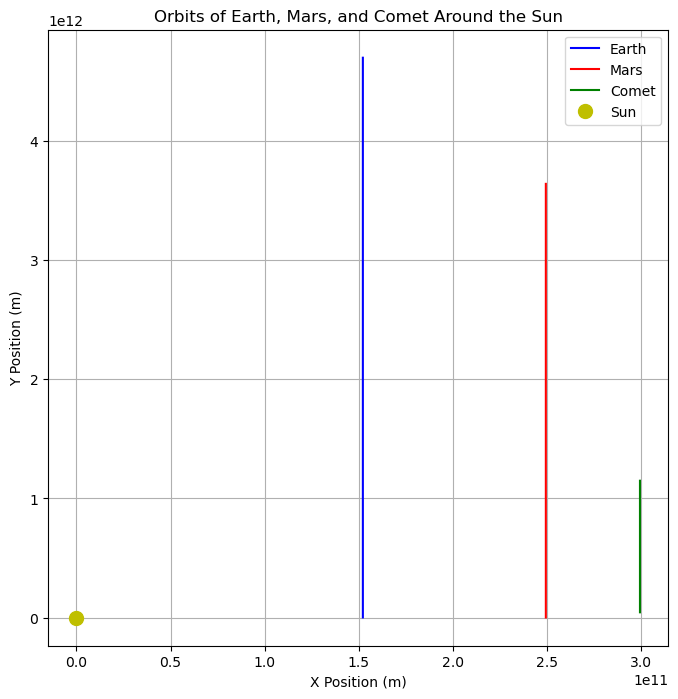

In [88]:
plt.figure(figsize=(8, 8))

# Plot the orbits of Earth, Mars, and Comet
plt.plot(xelist, yelist, label="Earth", color='blue')
plt.plot(xmlist, ymlist, label="Mars", color='red')
plt.plot(xclist, yclist, label="Comet", color='green')

# Plot the position of the Sun
plt.plot(xslist[0], yslist[0], 'yo', markersize=10, label="Sun")  # Sun as a yellow point

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Orbits of Earth, Mars, and Comet Around the Sun")
plt.legend()

plt.grid(True)

plt.show()

Goal: Animate the Motion
* Create an animated visualization of planetary orbits.
* Track the motion of each body over time.

\
Follow the procedure from lecture. Here are some hints:
* Set the `x` and `y` limits to `-3 * AU` to `3 * AU`. \


* Unpack the lines for Earth, Mars, the commet. Example: 
  * `line_e = axplot([], [], '-g', lw=1)` \

  
* Unpack the points for Earth, Mars, the commet and the Sun. Example:
  * `point_e, = ax.plot([],[],'bo',markersize=4)` \

* Give a title to each of the objects. Example:
  * `text_e  = ax.text(AU,0,'Earth')`

* Create the `update` function and update the lines, points and text you just unpacked. Example:
  * `line_e.set_data(xelist[:i], yelist[:i])` 
  * `point_e.set_data(xelist[i], yelist[i])`\
  * `text_e.set_position((xelist[i],yelist[i]))`


* Create the animation! Set `frames = len(xelist)`, `interval=1` and `blit=True`. 

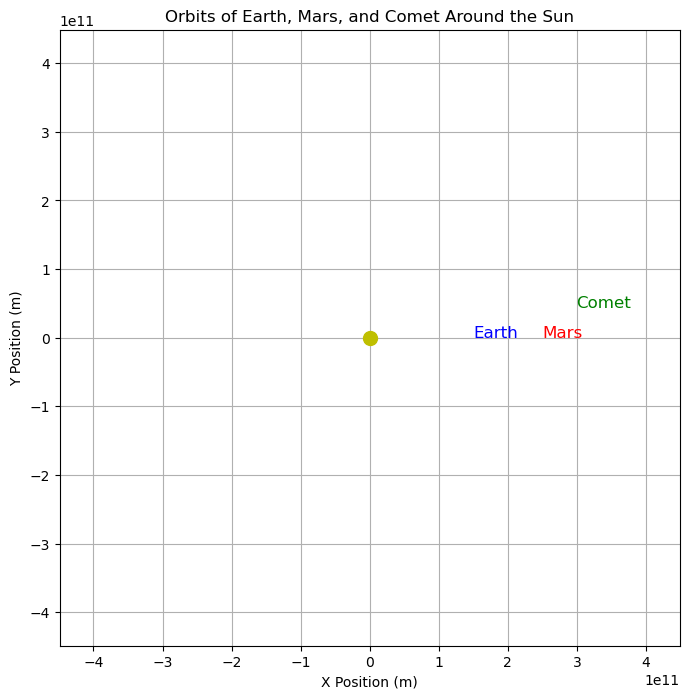

In [90]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xlim(-3 * AU, 3 * AU)
ax.set_ylim(-3 * AU, 3 * AU)

# Unpack the lines
line_e, = ax.plot([], [], '-b', lw=1)  # Earth in blue
line_m, = ax.plot([], [], '-r', lw=1)  # Mars in red
line_c, = ax.plot([], [], '-g', lw=1)  # Comet in green

# Unpack the points
point_e, = ax.plot([], [], 'bo', markersize=4)  # Earth as a blue point
point_m, = ax.plot([], [], 'ro', markersize=4)  # Mars as a red point
point_c, = ax.plot([], [], 'go', markersize=4)  # Comet as a green point
point_s, = ax.plot([], [], 'yo', markersize=10)  # Sun as a yellow point

# Add titles
text_e = ax.text(AU, 0, 'Earth', color='blue', fontsize=12)
text_m = ax.text(1.666 * AU, 0, 'Mars', color='red', fontsize=12)
text_c = ax.text(2 * AU, 0.3 * AU, 'Comet', color='green', fontsize=12)

# Initialize function
def init():
    line_e.set_data([], [])
    line_m.set_data([], [])
    line_c.set_data([], [])
    
    point_e.set_data([], [])
    point_m.set_data([], [])
    point_c.set_data([], [])
    
    point_s.set_data([xs], [ys])  # Wrap xs and ys in lists
    
    return line_e, line_m, line_c, point_e, point_m, point_c, point_s, text_e, text_m, text_c
    
# Update function for the animation: this will update the plot with new data at each frame
def update(i):
    line_e.set_data(xelist[:i], yelist[:i])
    line_m.set_data(xmlist[:i], ymlist[:i])
    line_c.set_data(xclist[:i], yclist[:i])
    
    point_e.set_data(xelist[i], yelist[i])
    point_m.set_data(xmlist[i], ymlist[i])
    point_c.set_data(xclist[i], yclist[i])
    
    text_e.set_position((xelist[i], yelist[i]))
    text_m.set_position((xmlist[i], ymlist[i]))
    text_c.set_position((xclist[i], yclist[i]))
    
    return line_e, line_m, line_c, point_e, point_m, point_c, point_s, text_e, text_m, text_c

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(xelist), init_func=init, blit=True, interval=1)

plt.title("Orbits of Earth, Mars, and Comet Around the Sun")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.grid(True)
plt.show()


## 3.4 Add Mercury, Venus and the Moon!
As an extra challenge, give your best attempt at simulating Mercury, Venus and/or the Moon! I am not going to give you a ton of hints for this problem. Come to office hours if you have questions :)

In [94]:
#new constants
Mm_moon = 7.35e22  # Mass of the Moon in kg
v_mercury = 47.87e3  # Orbital velocity of Mercury in m/s
v_venus = 35.02e3  # Orbital velocity of Venus in m/s
v_moon = 1.022e3  # Orbital velocity of the Moon in m/s

# Mercury, Venus, and Moon positions
x_mercury, y_mercury, z_mercury = 0.4667 * AU, 0, 0
xve_mercury, yve_mercury, zve_mercury = 0, v_mercury, 0

x_venus, y_venus, z_venus = 0.728 * AU, 0, 0
xve_venus, yve_venus, zve_venus = 0, v_venus, 0

x_moon, y_moon, z_moon = xe + 384400e3, ye, 0  # 384,400 km from Earth
xve_moon, yve_moon, zve_moon = 0, v_moon, 0

# Time variables
t = 0
dt = daysec  # Change in time (1 day in seconds)
years = 5
sim_years = years * 365 * daysec  # Simulation time in seconds

# Lists to store positions for plotting
xelist, yelist, xe_list = [xe], [ye], [xe]
xmlist, ymlist, xm_list = [xm], [ym], [xm]
xclist, yclist, xc_list = [xc], [yc], [xc]
xslist, yslist, xs_list = [0], [0], [0]
mercury_x_list, mercury_y_list = [x_mercury], [y_mercury]
venus_x_list, venus_y_list = [x_venus], [y_venus]
moon_x_list, moon_y_list = [x_moon], [y_moon]

# Gravitational constants for each body
gravconst_m = G * Mm

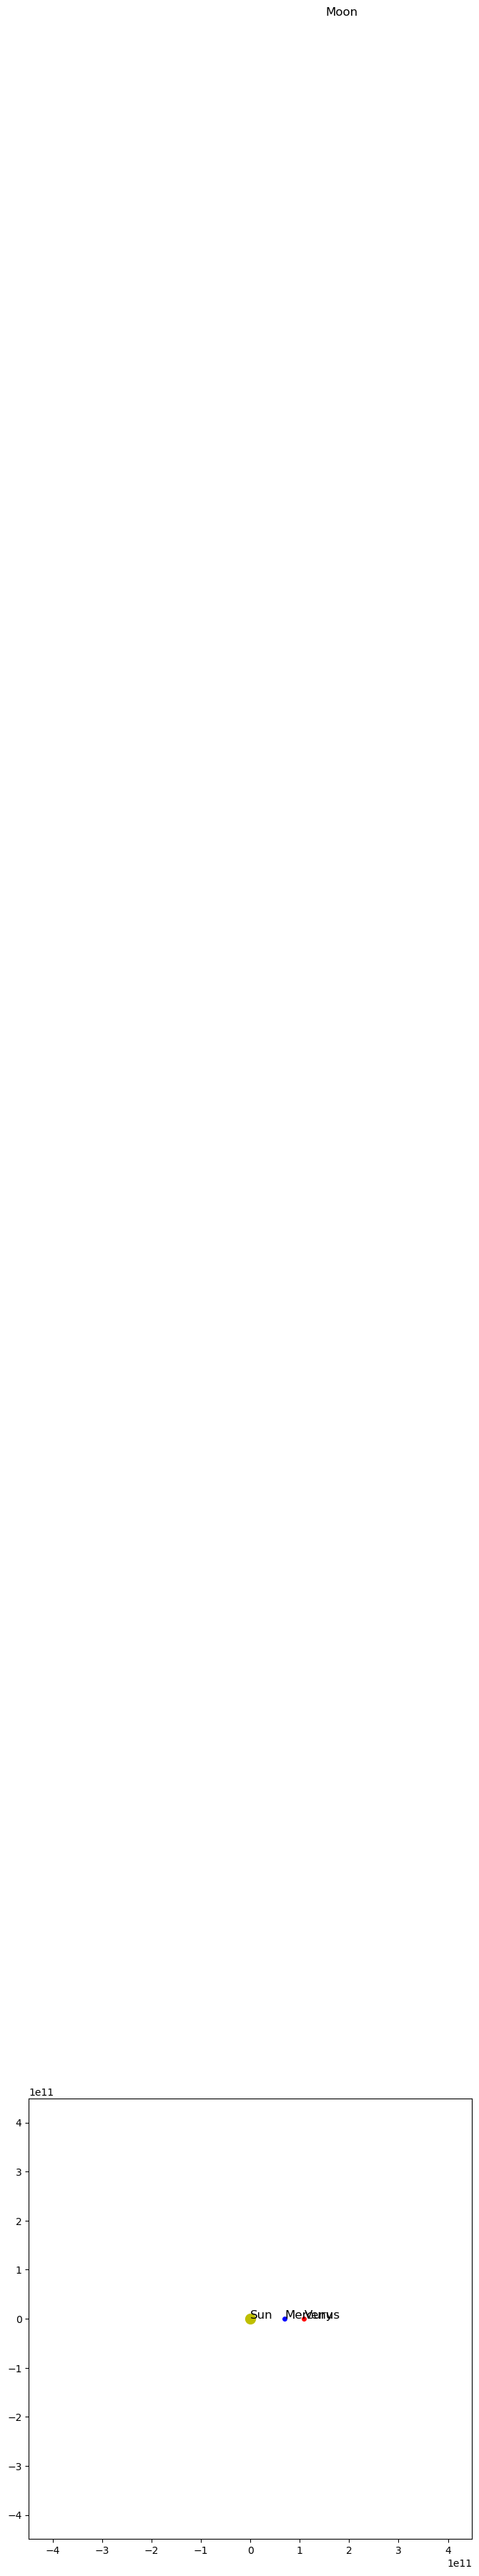

In [96]:
# Simulation loop
while t < sim_years:
    # Earth
    rx, ry, rz = xe - 0, ye - 0, ze - 0
    modr3_e = (rx**2 + ry**2 + rz**2)**1.5
    fx_e = -gravconst_e * rx / modr3_e
    fy_e = -gravconst_e * ry / modr3_e

    xve += fx_e * dt / Me
    yve += fy_e * dt / Me
    xe += xve * dt
    ye += yve * dt
    xelist.append(xe)
    yelist.append(ye)

    # Mars
    rx_m, ry_m, rz_m = xm - 0, ym - 0, zm - 0
    modr3_m = (rx_m**2 + ry_m**2 + rz_m**2)**1.5
    fx_m = -gravconst_m * rx_m / modr3_m
    fy_m = -gravconst_m * ry_m / modr3_m

    xvm += fx_m * dt / Mm
    yvm += fy_m * dt / Mm
    xm += xvm * dt
    ym += yvm * dt
    xmlist.append(xm)
    ymlist.append(ym)

    # Comet
    rx_c, ry_c, rz_c = xc - 0, yc - 0, zc - 0
    modr3_c = (rx_c**2 + ry_c**2 + rz_c**2)**1.5
    fx_c = -gravconst_c * rx_c / modr3_c
    fy_c = -gravconst_c * ry_c / modr3_c

    xvc += fx_c * dt / Mc
    yvc += fy_c * dt / Mc
    xc += xvc * dt
    yc += yvc * dt
    xclist.append(xc)
    yclist.append(yc)

    # Mercury
    rx_mercury = x_mercury - 0
    ry_mercury = y_mercury - 0
    modr3_mercury = (rx_mercury**2 + ry_mercury**2)**1.5
    fx_mercury = -gravconst_s * rx_mercury / modr3_mercury
    fy_mercury = -gravconst_s * ry_mercury / modr3_mercury

    xve_mercury += fx_mercury * dt / Mm
    yve_mercury += fy_mercury * dt / Mm
    x_mercury += xve_mercury * dt
    y_mercury += yve_mercury * dt
    mercury_x_list.append(x_mercury)
    mercury_y_list.append(y_mercury)

    # Venus
    rx_venus = x_venus - 0
    ry_venus = y_venus - 0
    modr3_venus = (rx_venus**2 + ry_venus**2)**1.5
    fx_venus = -gravconst_s * rx_venus / modr3_venus
    fy_venus = -gravconst_s * ry_venus / modr3_venus

    xve_venus += fx_venus * dt / Mm
    yve_venus += fy_venus * dt / Mm
    x_venus += xve_venus * dt
    y_venus += yve_venus * dt
    venus_x_list.append(x_venus)
    venus_y_list.append(y_venus)

    # Moon
    rx_moon = x_moon - xe
    ry_moon = y_moon - ye
    modr3_moon = (rx_moon**2 + ry_moon**2)**1.5
    fx_moon = -gravconst_s * rx_moon / modr3_moon
    fy_moon = -gravconst_s * ry_moon / modr3_moon

    xve_moon += fx_moon * dt / Mm_moon
    yve_moon += fy_moon * dt / Mm_moon
    x_moon += xve_moon * dt
    y_moon += yve_moon * dt
    moon_x_list.append(x_moon)
    moon_y_list.append(y_moon)

    t += dt

# Plotting and Animation Setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-3 * AU, 3 * AU)
ax.set_ylim(-3 * AU, 3 * AU)

line_mercury, = ax.plot([], [], '-b', lw=1, label='Mercury')
line_venus, = ax.plot([], [], '-r', lw=1, label='Venus')
line_moon, = ax.plot([], [], '-g', lw=1, label='Moon')
line_comet, = ax.plot([], [], '-c', lw=1, label='Comet')
line_earth, = ax.plot([], [], '-g', lw=1, label='Earth')
line_mars, = ax.plot([], [], '-r', lw=1, label='Mars')

point_mercury, = ax.plot([], [], 'bo', markersize=4)
point_venus, = ax.plot([], [], 'ro', markersize=4)
point_moon, = ax.plot([], [], 'go', markersize=4)
point_comet, = ax.plot([], [], 'co', markersize=4)
point_sun, = ax.plot([], [], 'yo', markersize=10)

text_mercury = ax.text(0, 0, 'Mercury', fontsize=12)
text_venus = ax.text(0, 0, 'Venus', fontsize=12)
text_moon = ax.text(0, 0, 'Moon', fontsize=12)
text_sun = ax.text(0, 0, 'Sun', fontsize=12)

def update(i):
    line_mercury.set_data(mercury_x_list[:i], mercury_y_list[:i])
    point_mercury.set_data([mercury_x_list[i]], [mercury_y_list[i]]) 
    text_mercury.set_position((mercury_x_list[i], mercury_y_list[i]))
    
    line_venus.set_data(venus_x_list[:i], venus_y_list[:i])
    point_venus.set_data([venus_x_list[i]], [venus_y_list[i]]) 
    text_venus.set_position((venus_x_list[i], venus_y_list[i]))
    
    line_moon.set_data(moon_x_list[:i], moon_y_list[:i])
    point_moon.set_data([moon_x_list[i]], [moon_y_list[i]]) 
    text_moon.set_position((moon_x_list[i], moon_y_list[i]))
    
    line_comet.set_data(xclist[:i], yclist[:i])
    point_comet.set_data([xclist[i]], [yclist[i]]) 
    
    # Check if the Sun's position list has enough elements
    if i < len(xslist):
        point_sun.set_data([xslist[i]], [yslist[i]])  # Update Sun's position

    return (line_mercury, line_venus, line_moon, line_comet, 
            point_mercury, point_venus, point_moon, point_comet, point_sun, 
            text_mercury, text_venus, text_moon, text_sun)
    
anim = FuncAnimation(fig, update, frames=len(mercury_x_list), interval=20, blit=True)
plt.show()

Save you animation as a `.gif` or as a `.mp4`. Include this in your submission! This may take up to a couple mintutes!

In [ ]:
# Your code here
anim.save("animation.mp4", writer="ffmpeg", fps=20)

Upload this notebook and your animations to Gradescope!